In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pylab as plt
import glob
import os
import shutil
from pprint import pprint

In [3]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath
import icewave.gps.gps as gps
import icewave.gps.garmin as garmin

Please install garmin package

/Volumes/


In [7]:
glob.glob('/Volumes/Share-1/Data/0221/GPS/*')

['/Volumes/Share-1/Data/0221/GPS/0000_2024-02-21 11_00_29.fit',
 '/Volumes/Share-1/Data/0221/GPS/0001_2024-02-21 16_39_45.fit',
 '/Volumes/Share-1/Data/0221/GPS/1000_Waypoints_2024-02-21.gpx']

In [35]:
date = '2024_0221'
year,day = date.split('_')

base = '/Volumes/Share-1/'#Data/0221/GPS/*'
#'Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/'
folder = base+'Data'+'/'+day+'/GPS/'
norme_folder = base + 'Nomenclature/'

print(glob.glob(base+'*'))
filelist = glob.glob(folder+'*.gpx')
print(filelist)
filegpx = filelist[0]

#base = '/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/'
#date = '2024_0211'
datesave=date.replace('_','/')
savefolder = folder#base + datesave + '/GPS/' 
print(savefolder)
import gpxpy

gpx_file = open(filegpx, 'r')
gpx = gpxpy.parse(gpx_file)
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            print('Point at ({0},{1}) -> {2}'.format(point.latitude, point.longitude, point.elevation))

for waypoint in gpx.waypoints:
    print('waypoint {0}, {1} -> ({2},{3})'.format(waypoint.name, waypoint.time.ctime(), waypoint.latitude, waypoint.longitude))

['/Volumes/Share-1/Notebooks', '/Volumes/Share-1/Data', '/Volumes/Share-1/git', '/Volumes/Share-1/Scripts', '/Volumes/Share-1/Stephane', '/Volumes/Share-1/Nomenclature', '/Volumes/Share-1/Biblio', '/Volumes/Share-1/Bestof']
['/Volumes/Share-1/Data/0221/GPS/1000_Waypoints_2024-02-21.gpx']
/Volumes/Share-1/Data/0221/GPS/
waypoint Sag240161, Wed Feb 21 16:20:49 2024 -> (48.347185,-68.804865)
waypoint Sag240162, Wed Feb 21 16:52:39 2024 -> (48.347808,-68.806203)
waypoint Sag240163, Wed Feb 21 17:08:52 2024 -> (48.347832,-68.808428)
waypoint Sag240164, Wed Feb 21 17:11:44 2024 -> (48.347426,-68.808447)
waypoint Sag240165, Wed Feb 21 17:14:09 2024 -> (48.347841,-68.809036)
waypoint Sag240166, Wed Feb 21 17:17:33 2024 -> (48.34744,-68.809052)
waypoint Sag240167, Wed Feb 21 17:19:07 2024 -> (48.347639,-68.80873)
waypoint Sag240168, Wed Feb 21 18:12:12 2024 -> (48.347446,-68.80919)
waypoint Sag240169, Wed Feb 21 18:32:57 2024 -> (48.347786,-68.809104)
waypoint Sag240170, Wed Feb 21 18:34:11 202

In [9]:
def represent_waypoints(gpx,imin,imax,table=None):
    if table is None:
        table = read_table()
        
    indices = select(gpx,imin,imax)
    Long,Lat = [],[]
    waypoints = np.asarray(gpx.waypoints)[indices]
    for waypoint in waypoints:
        Long.append(waypoint.longitude)
        Lat.append(waypoint.latitude)

    BBox = gps.box_data(Long,Lat,scale=0.7)
    ext = gps.extent(BBox)
    t = gps.tmp_connect()
    fig, ax = plt.subplots(figsize=(10, 10), dpi=200)
    ax,figs = gps.display_map(ext,t,title=date,ax=ax,width=600)

    X,Y = [],[]
    for waypoint in waypoints:
        number = int(waypoint.name[-3:])
        x,y = gps.project(waypoint.longitude,waypoint.latitude)
        X.append(x)
        Y.append(y)
        display(x,y,ax=ax,name=waypoint.name,table=table)
    #savefolder = os.path.dirname(filename)+'/'
    return ax,figs

def represent_table(table,gpx,imin,imax):
    indices = select(gpx,imin,imax)
    Long,Lat = [],[]
    waypoints = np.asarray(gpx.waypoints)[indices]
    for waypoint in waypoints:
        Long.append(waypoint.longitude)
        Lat.append(waypoint.latitude)

    BBox = gps.box_data(Long,Lat,scale=0.7)
    ext = gps.extent(BBox)
    t = gps.tmp_connect()
    fig, ax = plt.subplots(figsize=(10, 10), dpi=200)
    ax,figs = gps.display_map(ext,t,title=date,ax=ax,width=600)

    X,Y = [],[]
    numbers = np.asarray([int(waypoint.name[-3:]) for waypoint in gpx.waypoints])
    for (number,elem) in table:
        if number in numbers:
            ind = np.where(np.asarray(numbers)==number)[0][0]
            waypoint = gpx.waypoints[ind]
            x,y = gps.project(waypoint.longitude,waypoint.latitude)
            X.append(x)
            Y.append(y)
            name = elem
            if '_' in elem:
                tag,num = elem.split('_')
                label = norme[tag]
            else:
                label = norme[elem]
            ax.plot(x,y,label)
            
            name = name.replace('_','_{')
            name = '$'+name+'}$'
            plt.text(x,y-10**(-7),name)
    print(filename)
    savefolder = os.path.dirname(filename)+'/'
    return ax,figs
    
def display(x,y,ax=None,name='',table=None):
    if table==None:
        label = 'bo'
    else:
        number = int(name[-3:])
        numbers = [tab[0] for tab in table]
        if number in numbers:
            ind = np.where(np.asarray(numbers)==number)[0][0]
            key,elem = table[ind]
            if '_' in elem:
                name = elem
                tag,num = elem.split('_')
                label = norme[tag]
            else:
                label = norme[elem]
            #print(number,table[number],label)
        elif number>max(numbers):
            label='bo'
        else:
            label='bo'
        ax.plot(x,y,label)
        
    name = name.replace('_','_{')
    name = '$'+name+'}$'
    plt.text(x,y-10**(-7),name)
    

def select(gpx,imin,imax):
    indices = []
    for i,waypoint in enumerate(gpx.waypoints):
        number = int(waypoint.name[-3:])
        #print(number)
        if number>=imin and number<=imax:#True:#int(waypoint.name)>155 and int(waypoint.name)<250:
            indices.append(i)
    return indices

def read_table():
    print(glob.glob(folder+'*.txt'))
    filename = glob.glob(folder+'*.txt')[0]
    with open(filename,'r') as f:
        out = f.read()
    
    lines = out.split('\n')
    table = [line.split('\t') for line in lines]
    dtable = [(int(tab[0]),tab[1]) for tab in table]
    return dtable

def read_norme(folder):
    print(glob.glob(folder+'*.txt'))
    filename = "Nomenclature_plots.txt"
    
    with open(filename,'r') as f:
        out = f.read()
    
    lines = out.split('\n')
    table = np.asarray([line.split('\t') for line in lines])

    dtable = {tab[0]:tab[1] for tab in table}
    pprint(dtable)
    return dtable

In [46]:
global norme
norme = read_norme(norme_folder)
table = read_table()

['/Volumes/Share-1/Nomenclature/Nomenclature_GPS.txt', '/Volumes/Share-1/Nomenclature/Nomenclature_Name_UQAR.txt']
{'B': 'mo',
 'Canot': 'yo',
 'D': 'kp',
 'Frac': 'kx',
 'G': 'g^',
 'H': 'bv',
 'Quin': 'gv',
 'R': 'bs',
 'S': 'bo',
 'T': 'rs',
 'Tomo': 'g>',
 'borne': 'ks',
 'depart': 'g*',
 'fin': 'g*',
 'name': 'label',
 'plot': 'rp'}
['/Volumes/Share-1/Data/0221/GPS/Map_Table.txt']


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [27]:
print(table)
print(norme)

[(161, 'depart'), (162, 'Canot_01'), (163, 'plot_02'), (164, 'plot_01'), (163, 'G_0414'), (164, 'G_0406'), (165, 'plot_04'), (165, 'G_0416'), (166, 'plot_03'), (166, 'G_0408'), (167, 'borne_00'), (168, 'S_0206'), (169, 'S_0304'), (170, 'S_0305'), (171, 'S_0306'), (172, 'G_0413'), (173, 'G_0404'), (174, 'G_0402'), (175, 'G_0401'), (176, 'G_0405'), (177, 'plot_10'), (178, 'S_0401'), (179, 'S_0402'), (180, 'S_0403'), (181, 'S_0404'), (182, 'S_0405'), (183, 'S_0406'), (184, 'S_0407'), (185, 'S_0408'), (186, 'S_0409'), (187, 'S_0410'), (188, 'S_0411'), (189, 'S_0412'), (190, 'S_0413'), (191, 'S_0414'), (192, 'S_0415'), (193, 'S_0416'), (194, 'S_0417'), (195, 'S_0418'), (196, 'Frac_0101'), (197, 'Frac_0102'), (198, 'Frac_0103'), (199, 'Frac_0104'), (200, 'Frac_0105'), (201, 'Frac_0106')]
{'name': 'label', 'depart': 'g*', 'fin': 'g*', 'G': 'g^', 'B': 'mo', 'T': 'rs', 'D': 'kp', 'H': 'bv', 'S': 'bo', 'Tomo': 'g>', 'Quin': 'gv', 'borne': 'ks', 'plot': 'rp', 'R': 'bs', 'Canot': 'yo', 'Frac': 'kx

In [41]:
savefolder

'/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0211/GPS/'

['/Volumes/Share-1/Data/0221/GPS/Map_Table.txt']
Extent((0.3088597577777778,0.34615770731629114)->(0.30887802000000003,0.3461759695385134) projected as normal)
/Volumes/Share-1/Data/0221/GPS/


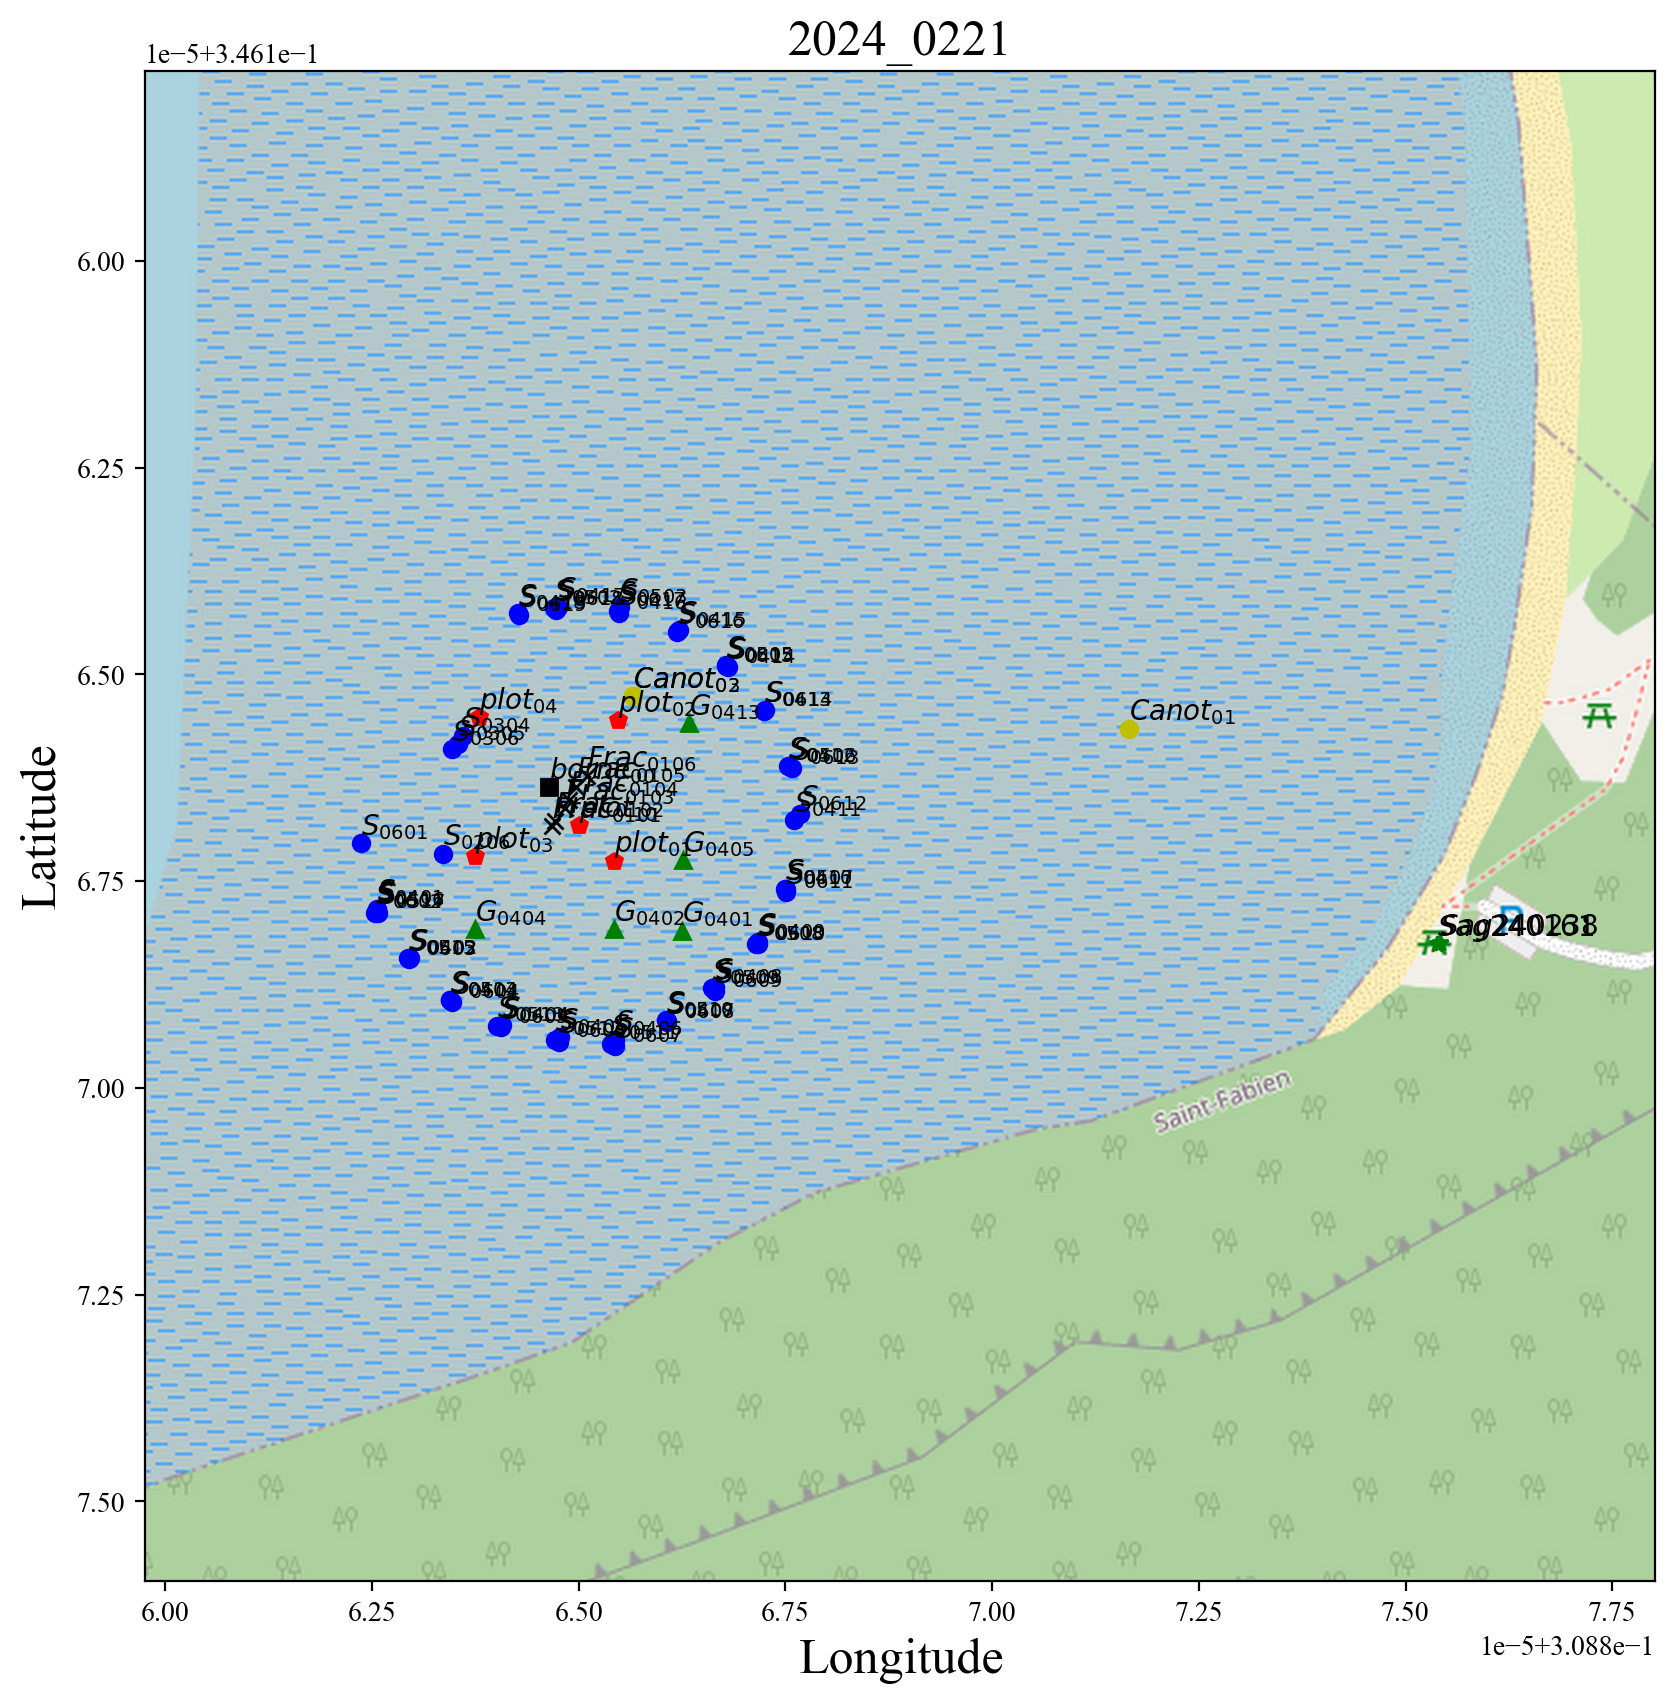

In [36]:
ax,figs = represent_waypoints(gpx,161,238)
print(savefolder)
graphes.save_figs(figs,savedir=savefolder,prefix='Carte_Generale_tout',suffix='labeled',frmt='pdf',overwrite=True)

['/Volumes/Share-1/Data/0221/GPS/Map_Table.txt']
Extent((0.3088613038888889,0.34616311907474084)->(0.30886874333333336,0.3461705585191853) projected as normal)


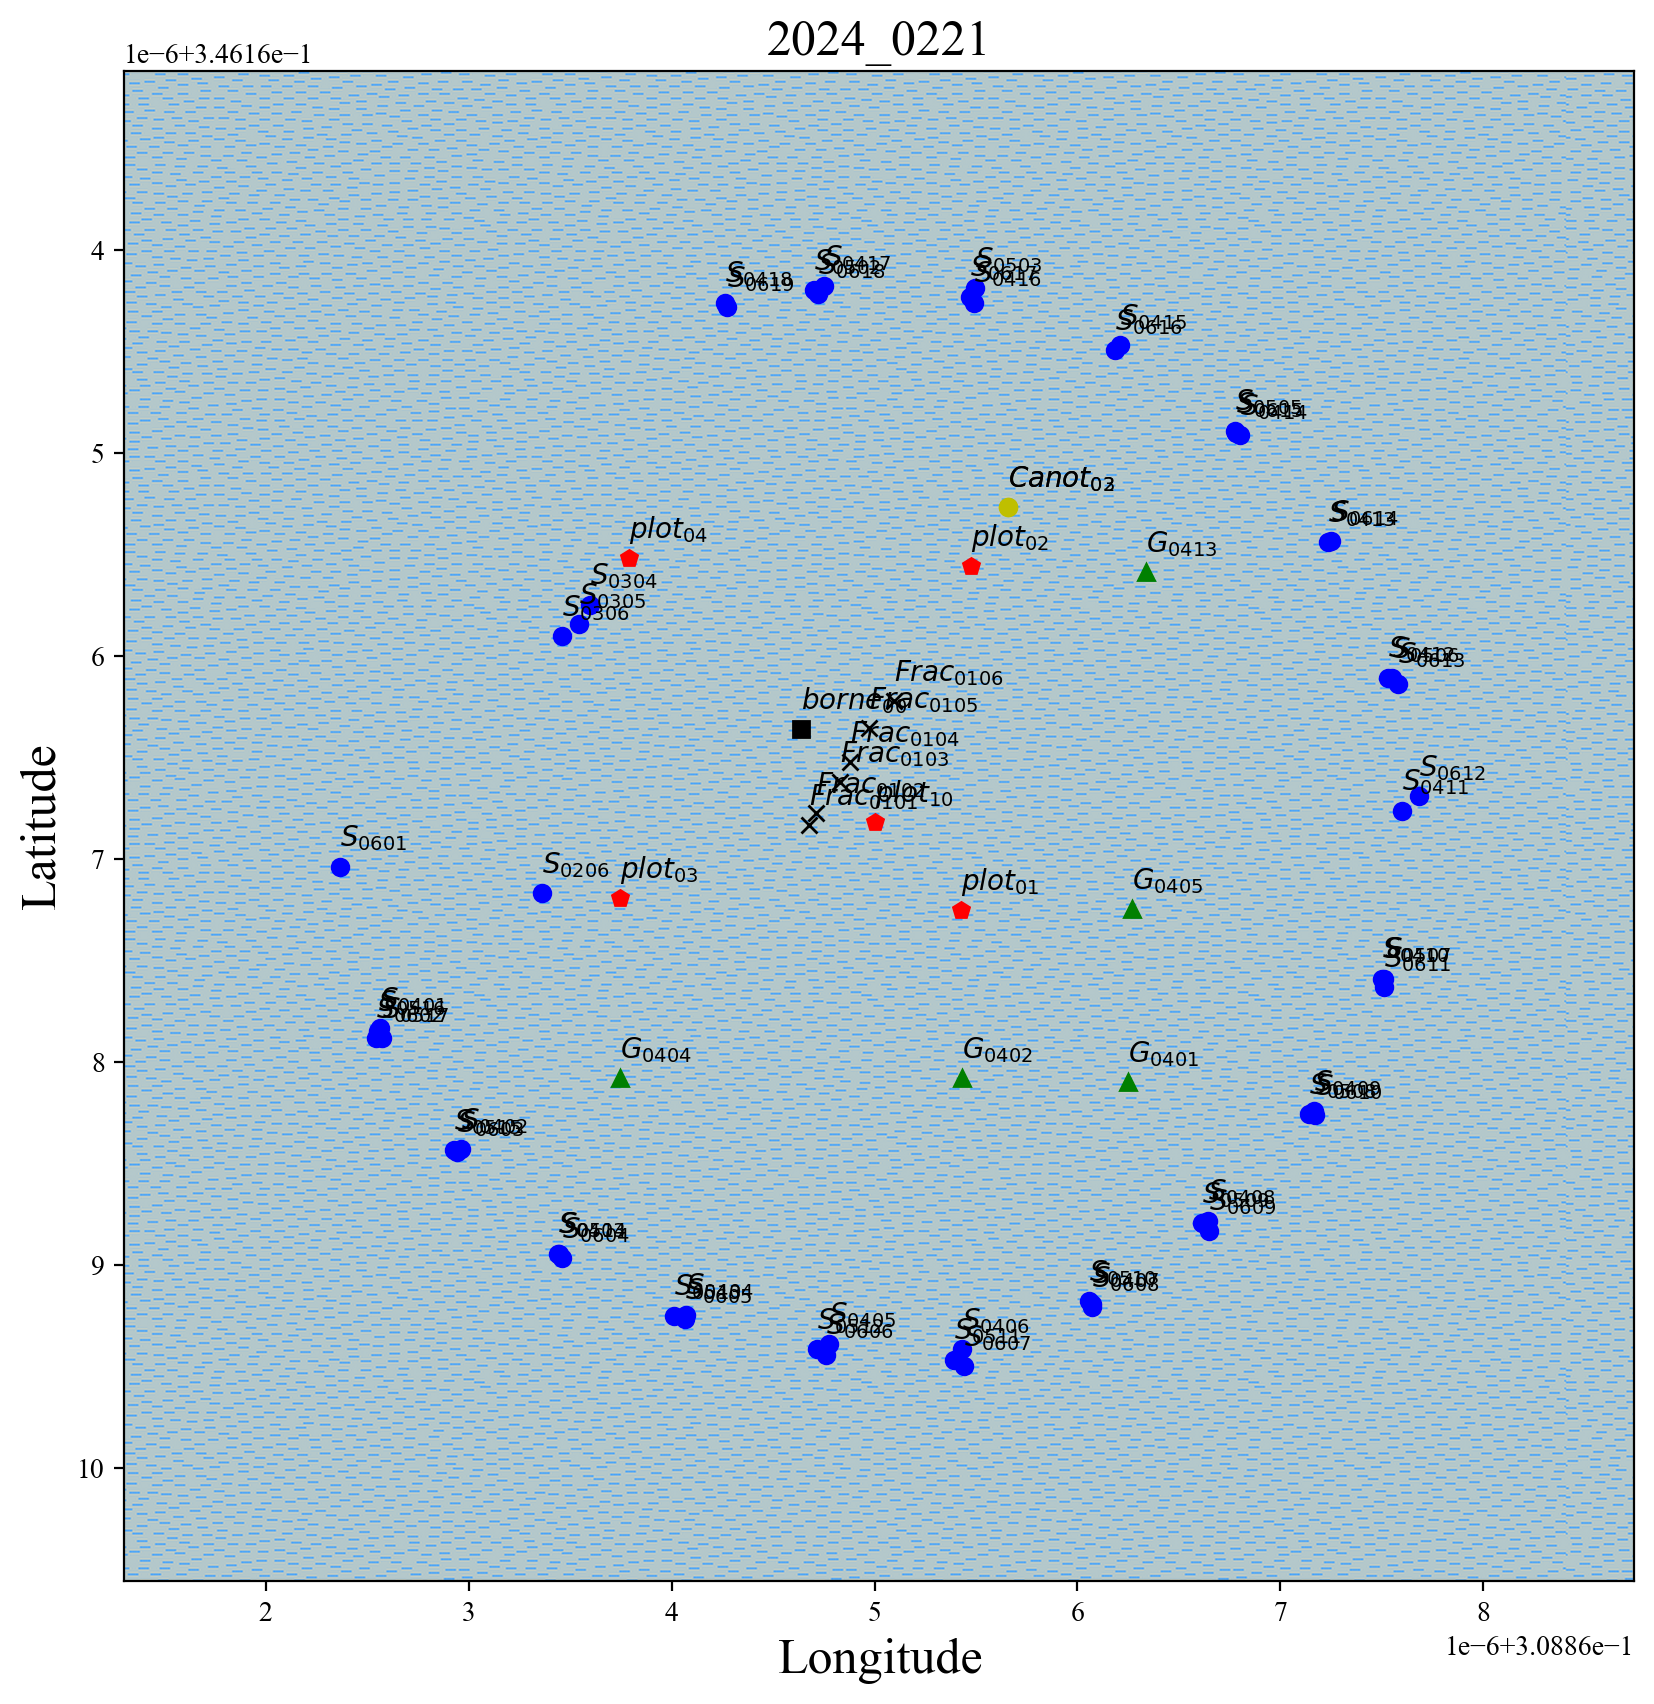

In [37]:
ax,figs = represent_waypoints(gpx,163,237)
graphes.save_figs(figs,savedir=savefolder,prefix='Carte_Generale_focus',suffix='labeled',frmt='pdf',overwrite=True)

In [261]:
gpx.waypoints[0]

GPXWaypoint(48.365506, -70.697383, elevation=1.292548, time=datetime.datetime(2024, 2, 10, 12, 21, 46, tzinfo=SimpleTZ("Z")), name='Sag240063', symbol='Flag, Blue')

In [67]:
import icewave.geometry.display as display

#print(table)
display.read_norme()

['name\tlabel\tsize\tdetail', 'depart\tg*\t20\tdepart', 'fin\tg*\t20\tfin', 'G\tg>\t10\tGeophone', 'B\tmo\t12\tBuoy', 'T\trs\t10\tTelephone', 'D\tkp\t16\tDrone', 'H\tbv\t10\tHauteur', 'S\tbo\t12\tSource', 'Tomo\tg>\t10\tTomographie', 'borne\tks\t20\tborne', 'plot\trp\t20\tplot', 'R\tbs\t24\tROV', 'Canot\tyo\t30\tCanot']


{'depart': {'name': 'depart', 'label': 'g*', 'size': '20', 'detail': 'depart'},
 'fin': {'name': 'fin', 'label': 'g*', 'size': '20', 'detail': 'fin'},
 'G': {'name': 'G', 'label': 'g>', 'size': '10', 'detail': 'Geophone'},
 'B': {'name': 'B', 'label': 'mo', 'size': '12', 'detail': 'Buoy'},
 'T': {'name': 'T', 'label': 'rs', 'size': '10', 'detail': 'Telephone'},
 'D': {'name': 'D', 'label': 'kp', 'size': '16', 'detail': 'Drone'},
 'H': {'name': 'H', 'label': 'bv', 'size': '10', 'detail': 'Hauteur'},
 'S': {'name': 'S', 'label': 'bo', 'size': '12', 'detail': 'Source'},
 'Tomo': {'name': 'Tomo',
  'label': 'g>',
  'size': '10',
  'detail': 'Tomographie'},
 'borne': {'name': 'borne', 'label': 'ks', 'size': '20', 'detail': 'borne'},
 'plot': {'name': 'plot', 'label': 'rp', 'size': '20', 'detail': 'plot'},
 'R': {'name': 'R', 'label': 'bs', 'size': '24', 'detail': 'ROV'},
 'Canot': {'name': 'Canot', 'label': 'yo', 'size': '30', 'detail': 'Canot'}}

[['#', 'X', 'Y', 'Z'], ['G_201', 0, 0, 0], ['G_202', 3, 0, 0], ['G_203', 6, 0, 0], ['G_204', 9, 0, 0], ['G_205', 12, 0, 0], ['G_206', 15, 0, 0], ['G_207', 18, 0, 0], ['G_208', 21, 0, 0], ['G_209', 24, 0, 0], ['G_210', 27, 0, 0], ['G_211', 30, 0, 0], ['G_212', 33, 0, 0], ['G_213', 36, 0, 0], ['G_214', 39, 0, 0], ['G_215', 42, 0, 0], ['G_216', 45, 0, 0], ['S_201', -5, 0, 0], ['S_202', -8, 0, 0], ['S_203', -11, 0, 0], ['S_204', 50, 0, 0], ['S_205', 53, 0, 0], ['S_206', 56, 0, 0]]
[['#', 'X', 'Y', 'Z'], ['G_101', 0, 0, 0], ['G_102', 0, -3, 0], ['G_103', 0, -6, 0], ['G_104', 0, -9, 0], ['G_105', 0, -12, 0], ['G_106', 0, -15, 0], ['G_107', 0, -18, 0], ['G_108', 0, -21, 0], ['G_109', 0, -24, 0], ['G_110', 0, -27, 0], ['G_111', 0, -30, 0], ['G_112', 0, -33, 0], ['G_113', 0, -36, 0], ['G_114', 0, -39, 0], ['G_115', 0, -42, 0], ['G_116', 0, -45, 0], ['S_101', 0, 5, 0], ['S_102', 0, 8, 0], ['S_103', 0, 11, 0], ['S_104', 0, -50, 0], ['S_105', 0, -53, 0], ['S_106', 0, -56, 0]]
[['#', 'X', 'Y', 'Z']

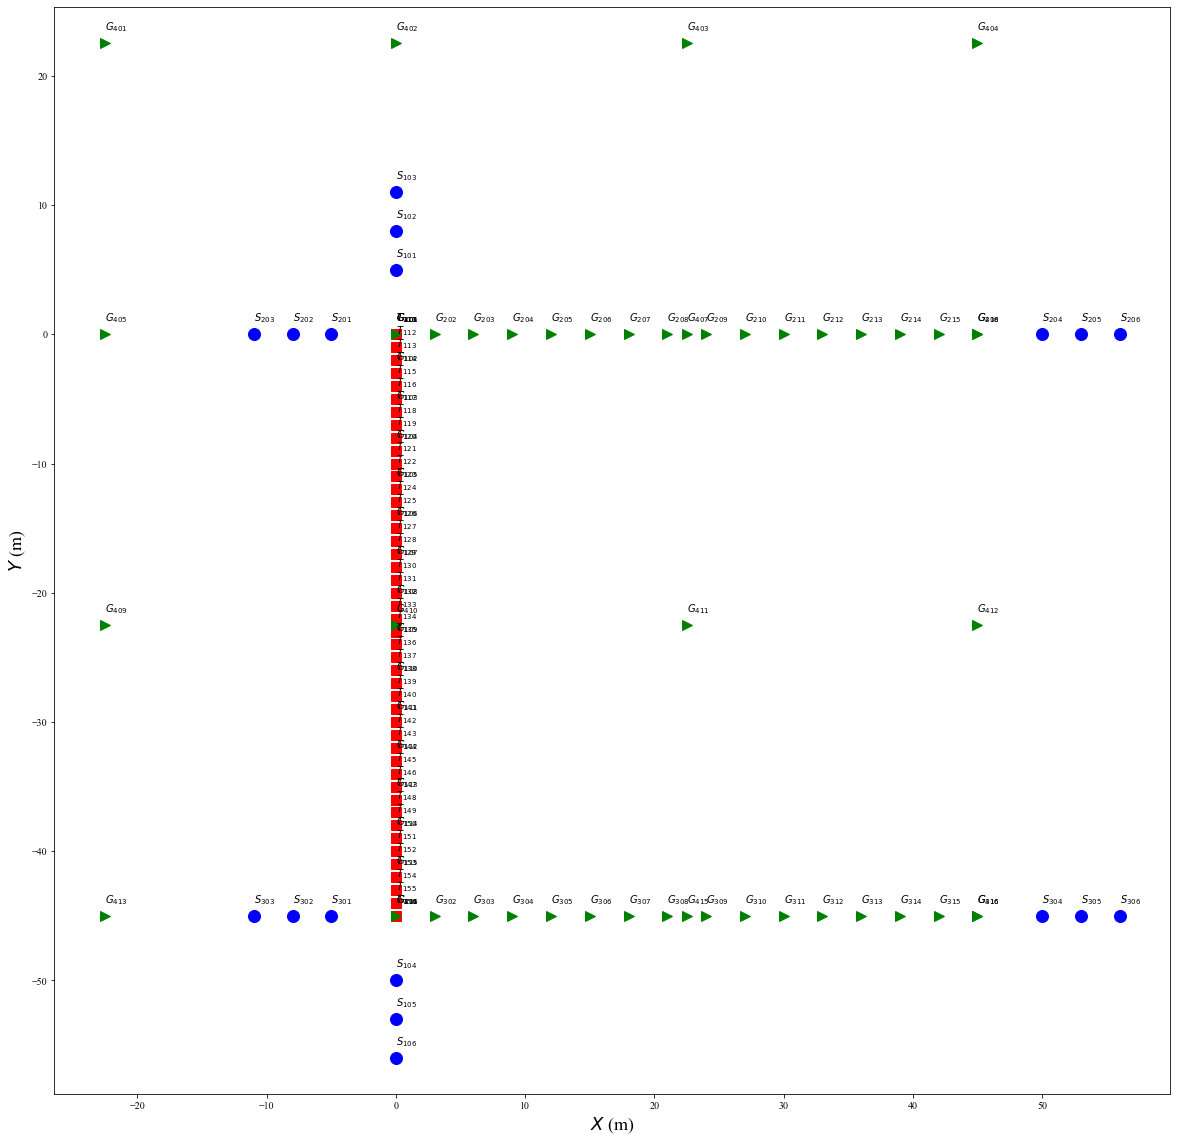

In [69]:
import icewave.geometry.experiment_2024_0221 as experiment

base = '/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/'
date = '2024_0221'
datesave=date.replace('_','/')
savefolder = base + datesave + '/Geometry/' 

figs,geom = experiment.Sag24_0221()
#graphes.save_figs(figs,savedir=savefolder,prefix='geometry_'+date,suffix='_general',overwrite=True)
#print(figs)

In [287]:
geom

[['#', 'X', 'Y', 'Z'],
 ['G_01', 0, 0, 0],
 ['G_02', 3, 0, 0],
 ['G_03', 6, 0, 0],
 ['G_04', 9, 0, 0],
 ['G_05', 12, 0, 0],
 ['G_06', 15, 0, 0],
 ['G_07', 18, 0, 0],
 ['G_08', 21, 0, 0],
 ['G_09', 24, 0, 0],
 ['G_10', 27, 0, 0],
 ['G_11', 30, 0, 0],
 ['G_12', 33, 0, 0],
 ['G_13', 36, 0, 0],
 ['G_14', 39, 0, 0],
 ['G_15', 42, 0, 0],
 ['G_16', 45, 0, 0],
 ['S_101', -5, 0, 0],
 ['S_102', -8, 0, 0],
 ['S_103', -11, 0, 0],
 ['S_104', 50, 0, 0],
 ['S_105', 53, 0, 0],
 ['S_106', 56, 0, 0],
 ['G_01', 0, 0, 0],
 ['G_02', 0, -3, 0],
 ['G_03', 0, -6, 0],
 ['G_04', 0, -9, 0],
 ['G_05', 0, -12, 0],
 ['G_06', 0, -15, 0],
 ['G_07', 0, -18, 0],
 ['G_08', 0, -21, 0],
 ['G_09', 0, -24, 0],
 ['G_10', 0, -27, 0],
 ['G_11', 0, -30, 0],
 ['G_12', 0, -33, 0],
 ['G_13', 0, -36, 0],
 ['G_14', 0, -39, 0],
 ['G_15', 0, -42, 0],
 ['G_16', 0, -45, 0],
 ['S_201', 0, 5, 0],
 ['S_202', 0, 8, 0],
 ['S_203', 0, 11, 0],
 ['S_204', 0, -50, 0],
 ['S_205', 0, -53, 0],
 ['S_206', 0, -56, 0],
 ['G_01', 0, -45, 0],
 ['G_02', 

In [293]:
import icewave.geometry.save as geom_save

filename = savefolder + 'Geom_table.txt'

#pprint(geom)

geom_save.save(geom,filename)